<a href="https://colab.research.google.com/github/Preetham253/Langchain-Projects/blob/main/1_Getting_Started_Langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chatbots With Langgraph

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.3 MB/s eta 0:00:00


In [3]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith = userdata.get('LANGSMITH_API_KEY')


In [4]:
import os
os.environ['LANGCHAIN_API_KEY'] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [5]:
from langchain_groq import ChatGroq

In [6]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b2092410d10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b2092499f10>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

### Building Chatbot using Langgraph

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [8]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [9]:
graph_builder

In [10]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])} #update the messages variable

In [11]:
#add chatbot to the graph builder
graph_builder.add_node("chatbot",chatbot)

In [12]:
graph_builder

In [13]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [14]:
graph = graph_builder.compile()

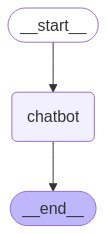

In [15]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 15, 'total_tokens': 30, 'completion_time': 0.028948375, 'prompt_time': 0.00232277, 'queue_time': None, 'total_time': 0.031271145}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7c991b84-1ff6-461a-baa7-08c8d2767d10-0', usage_metadata={'input_tokens': 15, 'output_tokens': 15, 'total_tokens': 30})}])
content='Hello! 👋  How can I help you today? 😊\n' response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 15, 'total_tokens': 30, 'completion_time': 0.028948375, 'prompt_time': 0.00232277, 'queue_time': None, 'total_time': 0.031271145}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-7c991b84-1ff6-461a-baa7-08c8d2767d10-0' usage_metadata={'input_tokens': 